In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn as imb
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_csv("drive/MyDrive/ML_Lab_Datasets/data.csv")

In [ ]:
df.head().T

,0,1,2,3,4
Bankrupt?,1.000000,1.000000,1.000000,1.000000,1.000000
ROA(C) before interest and depreciation before interest,0.370594,0.464291,0.426071,0.399844,0.465022
ROA(A) before interest and % after tax,0.424389,0.538214,0.499019,0.451265,0.538432
ROA(B) before interest and depreciation after tax,0.405750,0.516730,0.472295,0.457733,0.522298
Operating Gross Margin,0.601457,0.610235,0.601450,0.583541,0.598783
...,...,...,...,...,...
Liability to Equity,0.290202,0.283846,0.290189,0.281721,0.278514
Degree of Financial Leverage (DFL),0.026601,0.264577,0.026555,0.026697,0.024752
Interest Coverage Ratio (Interest expense to EBIT),0.564050,0.570175,0.563706,0.564663,0.575617
Net Income Flag,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [ ]:
# fig, ax = plt.subplots()
# ax.hist( df["Bankrupt?"][:1000],df[" Current Ratio"][:1000])

In [ ]:
df[" Current Ratio"].value_counts()

0.006916    4
0.007139    4
0.009163    4
0.005888    4
0.006145    4
           ..
0.011935    1
0.009692    1
0.009061    1
0.009994    1
0.051348    1
Name:  Current Ratio, Length: 6132, dtype: int64

<Axes: ylabel='Frequency'>

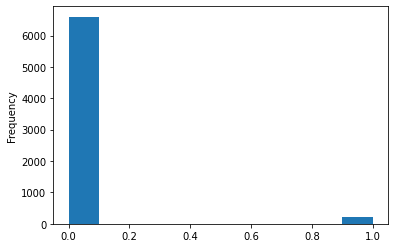

In [ ]:
df["Bankrupt?"].plot.hist()

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Separate features and target variable
X = df.iloc[:,1:]
y = df.iloc[:,0]
# np.array(df[bank])

In [ ]:
oversampler = RandomOverSampler()

In [ ]:
X_oversampled, y_oversampled = oversampler.fit_resample(X,y)

In [ ]:
data_oversampled = pd.concat([pd.DataFrame(y_oversampled), pd.DataFrame(X_oversampled)], axis=1)

In [ ]:
data_oversampled.to_csv('drive/MyDrive/ML_Lab_Datasets/oversampled_bankruptcy.csv', index=False)

In [ ]:
data_oversampled.columns[data_oversampled.isna().any()]


Index([], dtype='object')

In [ ]:
def clean_col_names(col_name):
  col_name = (
      col_name.strip()
      .replace("?","_")
      .replace("(","_")
      .replace(")","_")
      .replace(" ","_")
      .replace("/","_")
      .replace("-","_")
      .replace("--","_")
      .replace("'","_")
      .lower()
  )

  return col_name

In [ ]:
bank_columns = list(data_oversampled.columns)
bank_columns = [clean_col_names(col_name) for col_name in bank_columns]
data_oversampled.columns = bank_columns
display(data_oversampled.columns)

Index(['bankrupt_', 'roa_c__before_interest_and_depreciation_before_interest',
       'roa_a__before_interest_and_%_after_tax',
       'roa_b__before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre_tax_net_interest_rate',
       'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate__after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate__a_',
       'net_value_per_share__b_', 'net_value_per_share__a_',
       'net_value_per_share__c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share__yuan_¥_',
       'operating_profit_per_share__yuan_¥_',
       'per_share_net_profit_before_tax__yuan_¥_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax

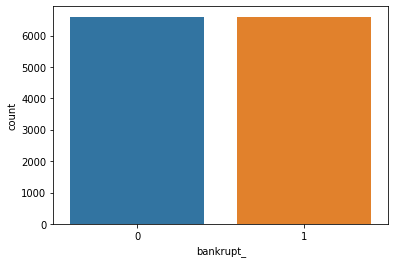

In [ ]:
import seaborn as sns
class_bar = sns.countplot(data=data_oversampled, x="bankrupt_")
ax = plt.gca()
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()+500))
  class_bar

Distribution of All Features

In [ ]:
!pip install scipy
import scipy.stats
skew_df = pd.DataFrame(data_oversampled.select_dtypes(np.number).columns, columns = ['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda feature:scipy.stats.skew(data_oversampled[feature]))

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs) # to obtain magnitude of skew irrelevant of direction

skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x>=0.5 else False)
with pd.option_context("display.max_rows",1000):
  display(skew_df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-54-f8810e25aa1a>:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_df['Skew'] = skew_df['Feature'].apply(lambda feature:scipy.stats.skew(data_oversampled[feature]))


,Feature,Skew,Absolute Skew,Skewed
0,bankrupt_,0.000000,0.000000,False
1,roa_c__before_interest_and_depreciation_before...,-1.256862,1.256862,True
2,roa_a__before_interest_and_%_after_tax,-1.726236,1.726236,True
3,roa_b__before_interest_and_depreciation_after_tax,-1.582123,1.582123,True
4,operating_gross_margin,-4.640020,4.640020,True
5,realized_sales_gross_margin,-4.662713,4.662713,True
6,operating_profit_rate,-97.310439,97.310439,True
7,pre_tax_net_interest_rate,-67.012190,67.012190,True
8,after_tax_net_interest_rate,-66.265332,66.265332,True
9,non_industry_income_and_expenditure_revenue,40.361967,40.361967,True


In [ ]:
data_oversampled.describe()

,bankrupt_,roa_c__before_interest_and_depreciation_before_interest,roa_a__before_interest_and_%_after_tax,roa_b__before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,...,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholder_s_equity,liability_to_equity,degree_of_financial_leverage__dfl_,interest_coverage_ratio__interest_expense_to_ebit_,net_income_flag,equity_to_liability
count,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,...,13198.000000,1.319800e+04,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.0,13198.000000
mean,0.500000,0.463258,0.508836,0.508870,0.603331,0.603343,0.998746,0.796895,0.808782,0.303128,...,0.773551,5.174451e+07,0.623670,0.603330,0.833672,0.286714,0.028074,0.565220,1.0,0.036573
std,0.500019,0.083239,0.102939,0.090443,0.016589,0.016566,0.009363,0.009523,0.010139,0.008826,...,0.073380,6.386081e+08,0.009707,0.016589,0.054027,0.050414,0.016685,0.010376,0.0,0.053009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.433384,0.474651,0.479844,0.597025,0.597056,0.998859,0.797105,0.809046,0.303274,...,0.757106,9.773923e-04,0.623263,0.597026,0.836016,0.278130,0.026637,0.564469,1.0,0.018091
50%,0.500000,0.473212,0.534971,0.523957,0.602034,0.602034,0.998973,0.797378,0.809301,0.303458,...,0.794828,2.643143e-03,0.623737,0.602035,0.840053,0.281563,0.026791,0.565158,1.0,0.023615
75%,1.000000,0.506362,0.564381,0.557578,0.609534,0.609586,0.999043,0.797479,0.809391,0.303537,...,0.812564,7.229395e-03,0.624078,0.609530,0.841510,0.286656,0.026877,0.565696,1.0,0.036927
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
data_oversampled.head()

,bankrupt_,roa_c__before_interest_and_depreciation_before_interest,roa_a__before_interest_and_%_after_tax,roa_b__before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,...,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholder_s_equity,liability_to_equity,degree_of_financial_leverage__dfl_,interest_coverage_ratio__interest_expense_to_ebit_,net_income_flag,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


<ipython-input-57-10be0775ce23>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_oversampled[cols[i]], ax = ax[i // ncols, i % ncols])


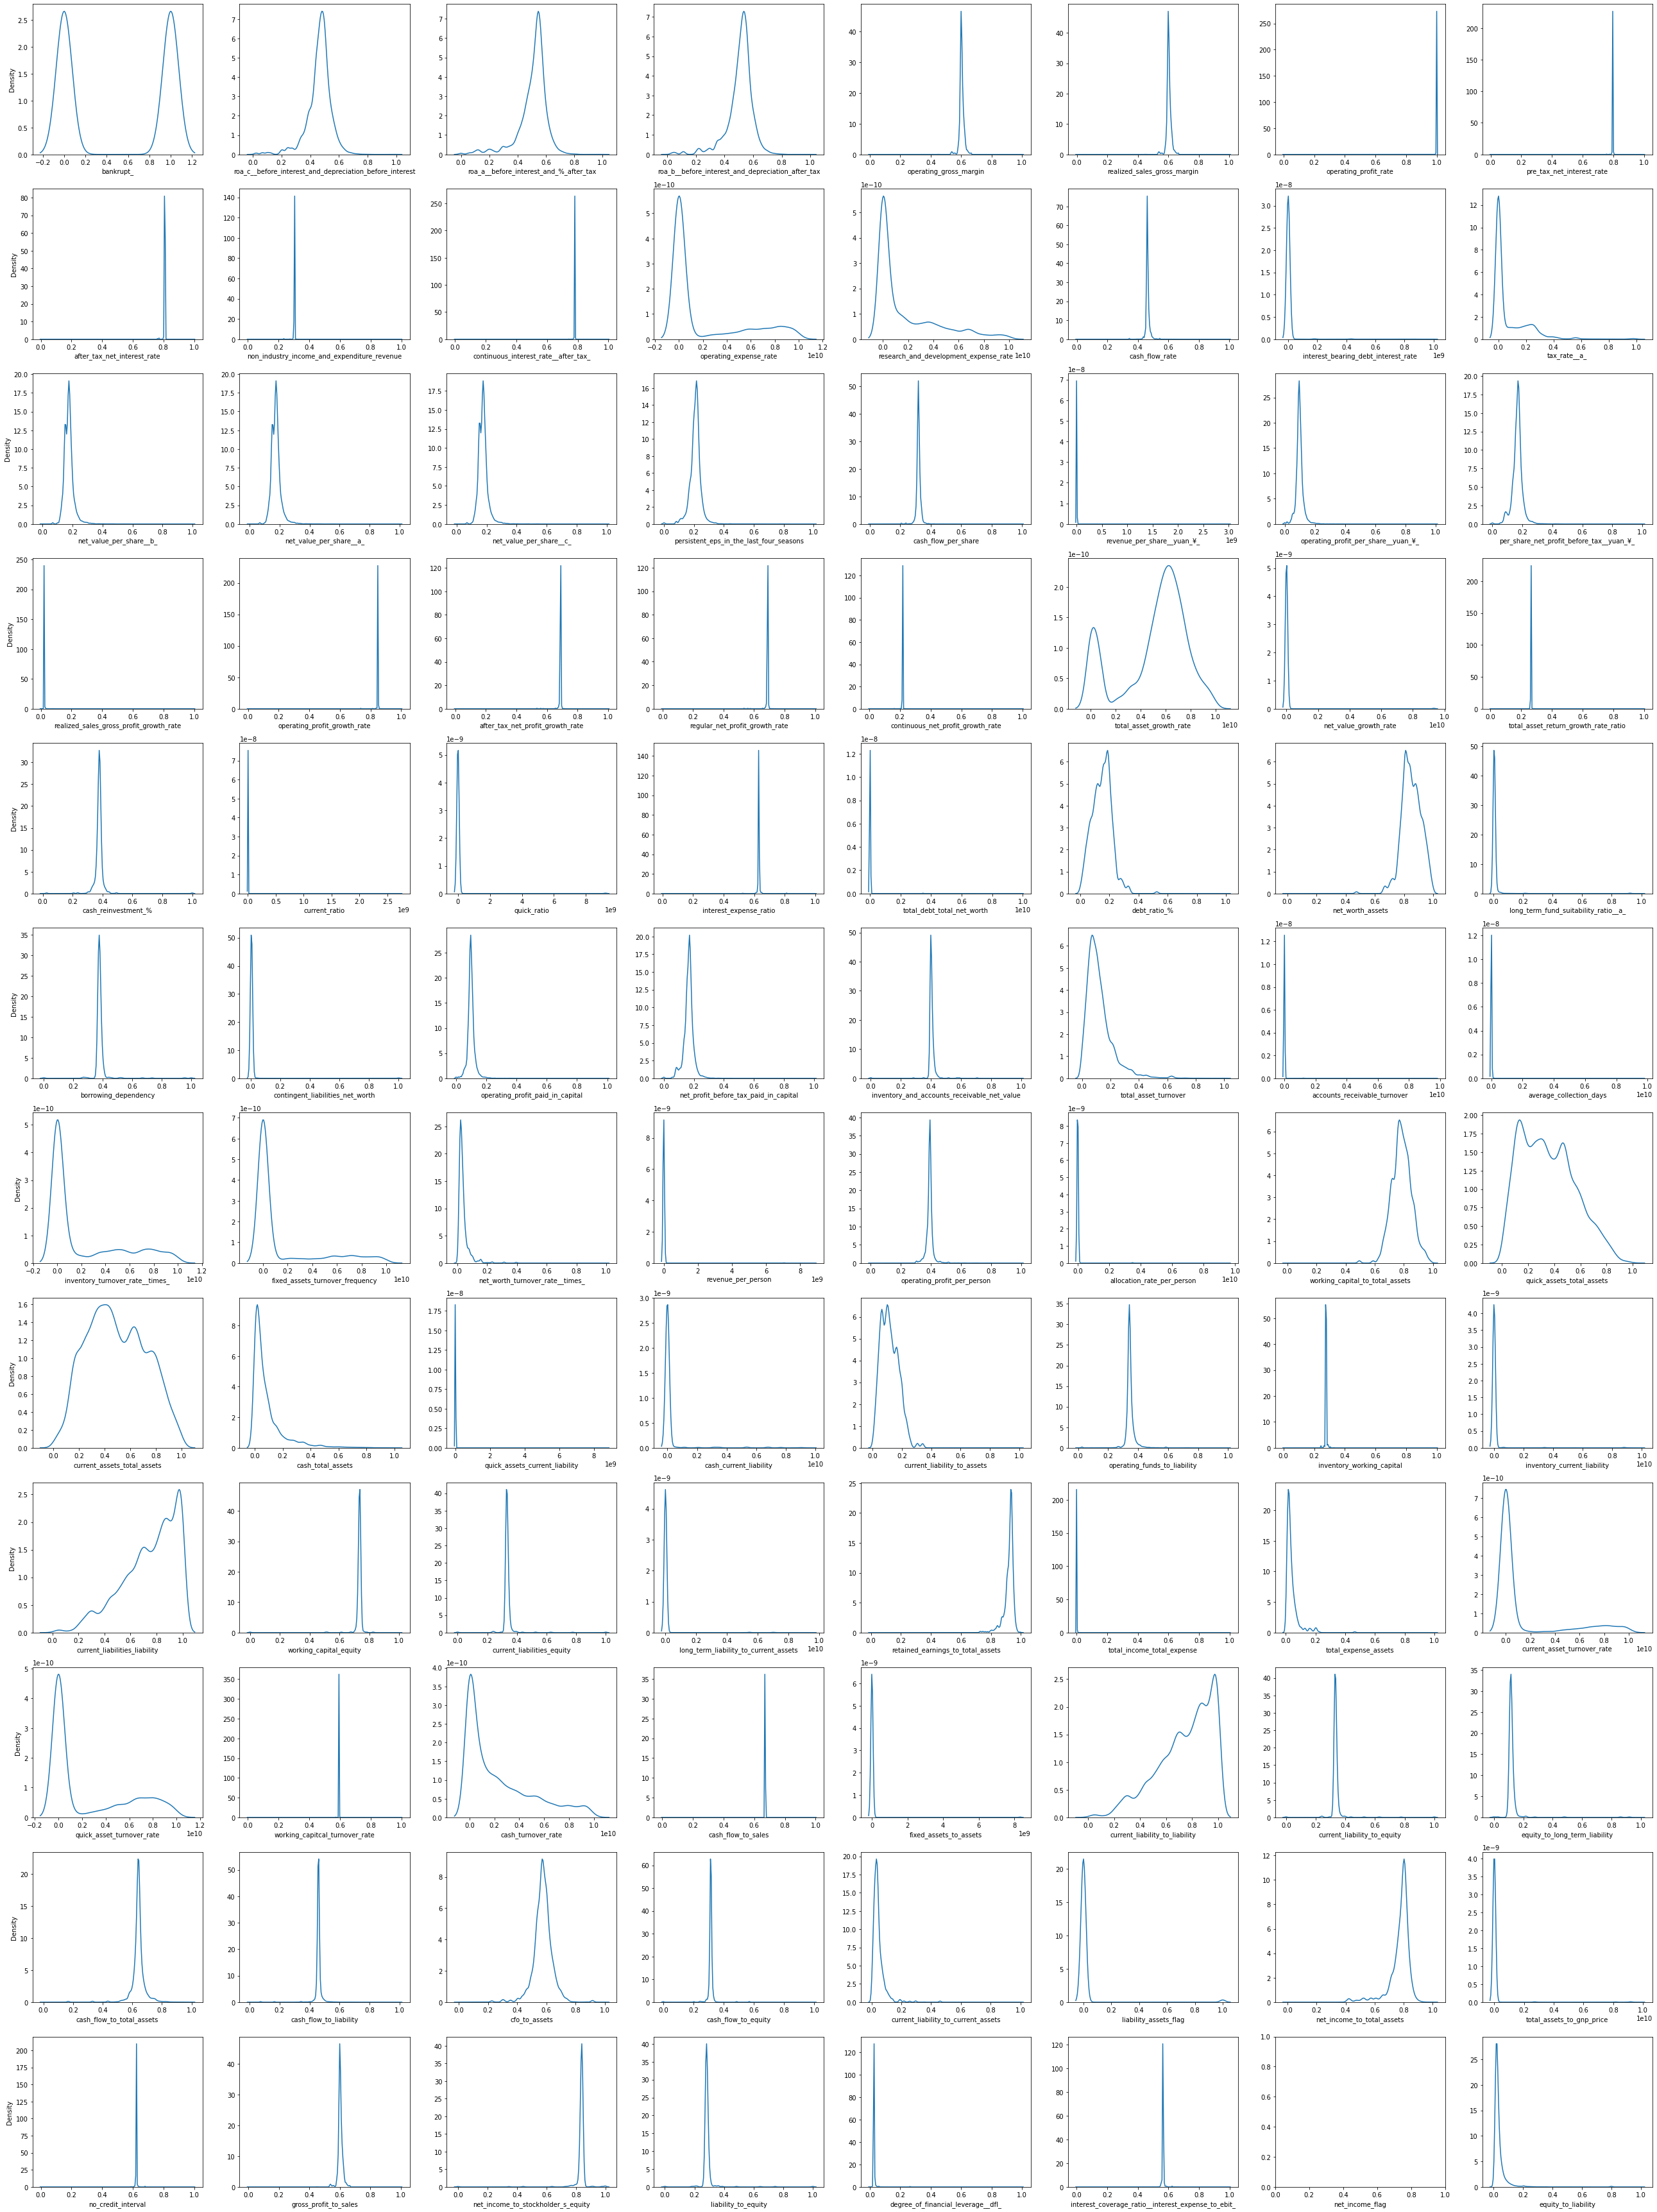

In [ ]:
# Visualisation of distributions
import math
cols = list(data_oversampled.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
  sns.kdeplot(data_oversampled[cols[i]], ax = ax[i // ncols, i % ncols])
  if i % ncols != 0:
    ax[i // ncols, i % ncols].set_ylabel(" ")

plt.tight_layout()
plt.show()

In [ ]:
query_skew = skew_df.query("Skewed == True")["Feature"]
with pd.option_context("display.max_rows",1000):
  display(query_skew)

1     roa_c__before_interest_and_depreciation_before...
2                roa_a__before_interest_and_%_after_tax
3     roa_b__before_interest_and_depreciation_after_tax
4                                operating_gross_margin
5                           realized_sales_gross_margin
6                                 operating_profit_rate
7                             pre_tax_net_interest_rate
8                           after_tax_net_interest_rate
9           non_industry_income_and_expenditure_revenue
10                 continuous_interest_rate__after_tax_
11                               operating_expense_rate
12                research_and_development_expense_rate
13                                       cash_flow_rate
14                  interest_bearing_debt_interest_rate
15                                         tax_rate__a_
16                              net_value_per_share__b_
17                              net_value_per_share__a_
18                              net_value_per_sh

# Feature Engineering

In [ ]:
df1 = data_oversampled.drop(["net_income_flag"],axis=1)

In [ ]:
df1.describe()

,bankrupt_,roa_c__before_interest_and_depreciation_before_interest,roa_a__before_interest_and_%_after_tax,roa_b__before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,...,liability_assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholder_s_equity,liability_to_equity,degree_of_financial_leverage__dfl_,interest_coverage_ratio__interest_expense_to_ebit_,equity_to_liability
count,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,...,13198.000000,13198.000000,1.319800e+04,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000
mean,0.500000,0.463258,0.508836,0.508870,0.603331,0.603343,0.998746,0.796895,0.808782,0.303128,...,0.015078,0.773551,5.174451e+07,0.623670,0.603330,0.833672,0.286714,0.028074,0.565220,0.036573
std,0.500019,0.083239,0.102939,0.090443,0.016589,0.016566,0.009363,0.009523,0.010139,0.008826,...,0.121868,0.073380,6.386081e+08,0.009707,0.016589,0.054027,0.050414,0.016685,0.010376,0.053009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.433384,0.474651,0.479844,0.597025,0.597056,0.998859,0.797105,0.809046,0.303274,...,0.000000,0.757106,9.773923e-04,0.623263,0.597026,0.836016,0.278130,0.026637,0.564469,0.018091
50%,0.500000,0.473212,0.534971,0.523957,0.602034,0.602034,0.998973,0.797378,0.809301,0.303458,...,0.000000,0.794828,2.643143e-03,0.623737,0.602035,0.840053,0.281563,0.026791,0.565158,0.023615
75%,1.000000,0.506362,0.564381,0.557578,0.609534,0.609586,0.999043,0.797479,0.809391,0.303537,...,0.000000,0.812564,7.229395e-03,0.624078,0.609530,0.841510,0.286656,0.026877,0.565696,0.036927
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Matrix

<Axes: >

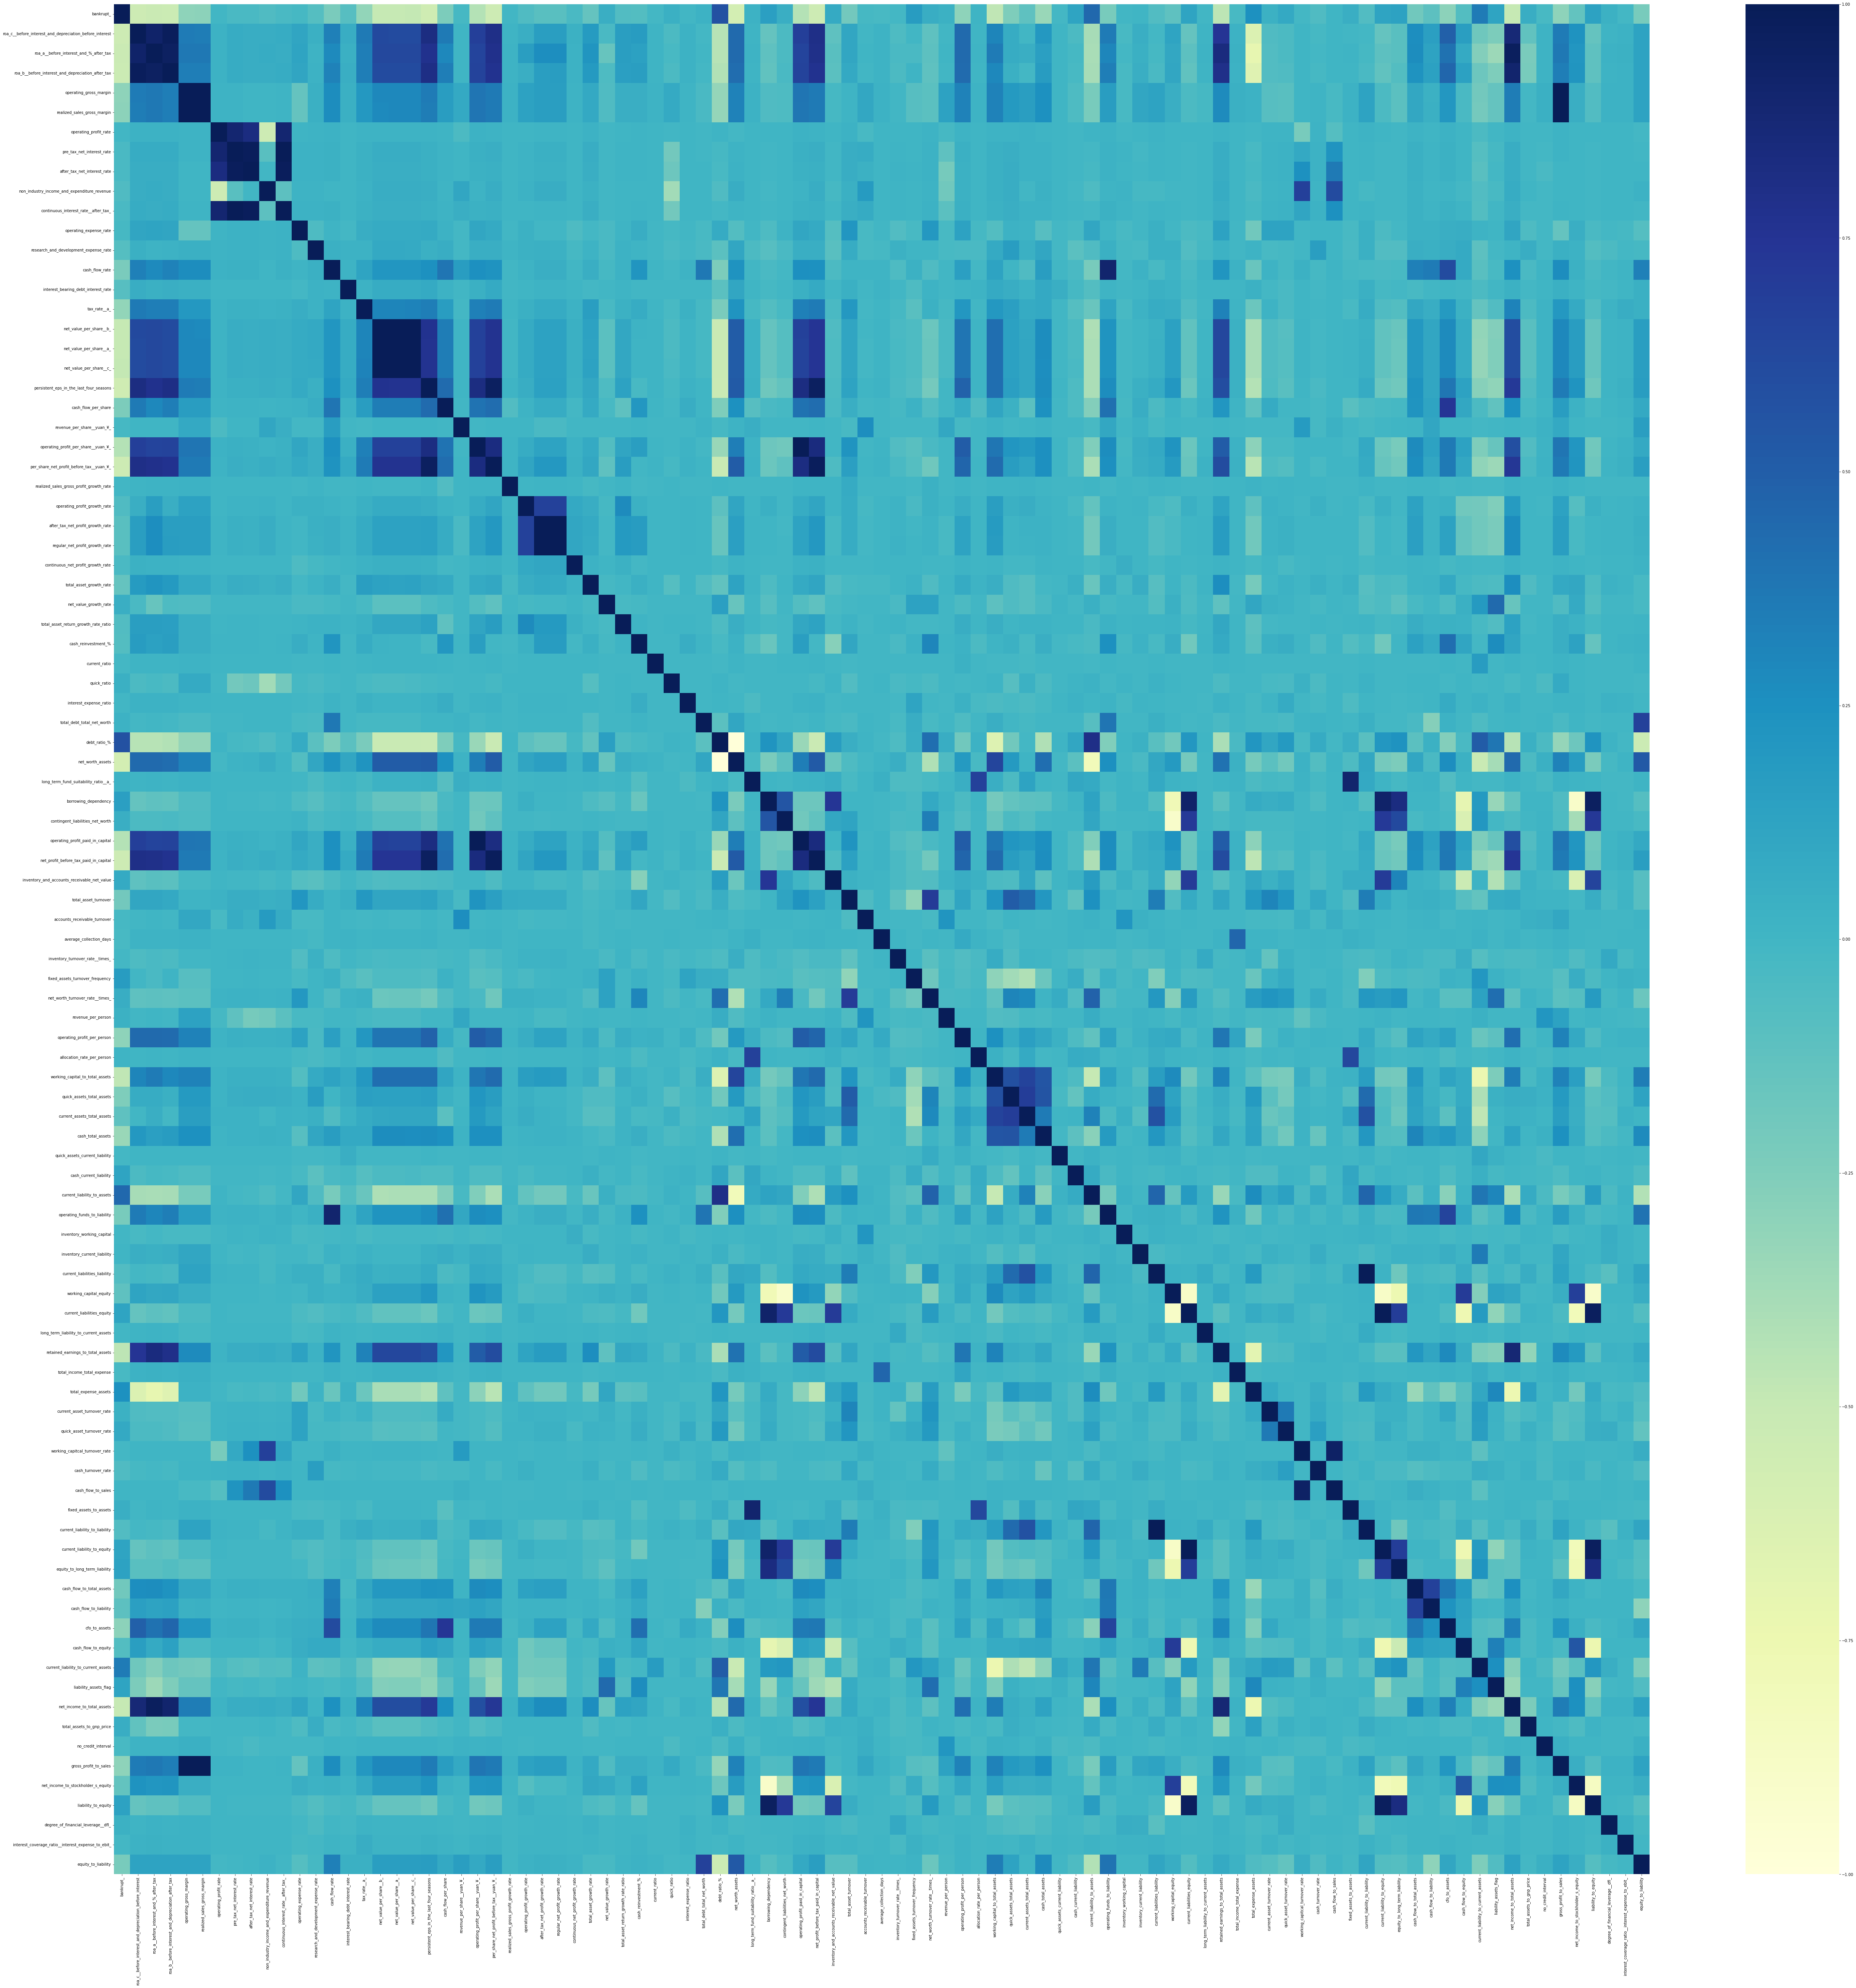

In [ ]:
fig = plt.figure(figsize=(90,90))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(df1.corr(),ax=ax1,cmap="YlGnBu")

### IDENTIFY HIGHEST FEATURES CORRELATED TO BANKRUPTCY

#### Based on fundamental understanding, businesses that go bankrupt have few assets, high debt, low profitability and low cash flow

In [ ]:
corr=df1[df1.columns[:-1]].corr()['bankrupt_'][:]

corr_df = pd.DataFrame(corr)

print("Correlations to Bankruptcy:")
for index, row in corr_df["bankrupt_"].iteritems():
    if row!=1.0 and row>=0.5:
        print(f'Positive Correlation: {index}')
    elif row!=1.0 and row<=-0.5:
        print(f'Negative Correlation: {index}')


Correlations to Bankruptcy:
Negative Correlation: roa_c__before_interest_and_depreciation_before_interest
Negative Correlation: roa_a__before_interest_and_%_after_tax
Negative Correlation: roa_b__before_interest_and_depreciation_after_tax
Negative Correlation: persistent_eps_in_the_last_four_seasons
Negative Correlation: per_share_net_profit_before_tax__yuan_¥_
Positive Correlation: debt_ratio_%
Negative Correlation: net_worth_assets
Negative Correlation: net_profit_before_tax_paid_in_capital


## Explanation of these features
* roa_c_before_interest_and_depreciation_before_interest: Return on total assets- if return on total assets is low, higher risk of bankruptcy
* debt_ratio: Liability over total assets - higher the value, the higher amount of debt over assets, which leads to higher risk of bankruptcy
* net_worth_assets: Lesser net assets, higher risk of bankruptcy
* persistent_eps_in_the_last_four_seasons: Earning per share plays an important role in defining a company's operational revenue

### Box Plot

* Box plots detail the minimum value, 25th percentile (aka Q1), median (aka 50th percentile), 75th percentile (aka Q3) and the maximum value in a visual manner.

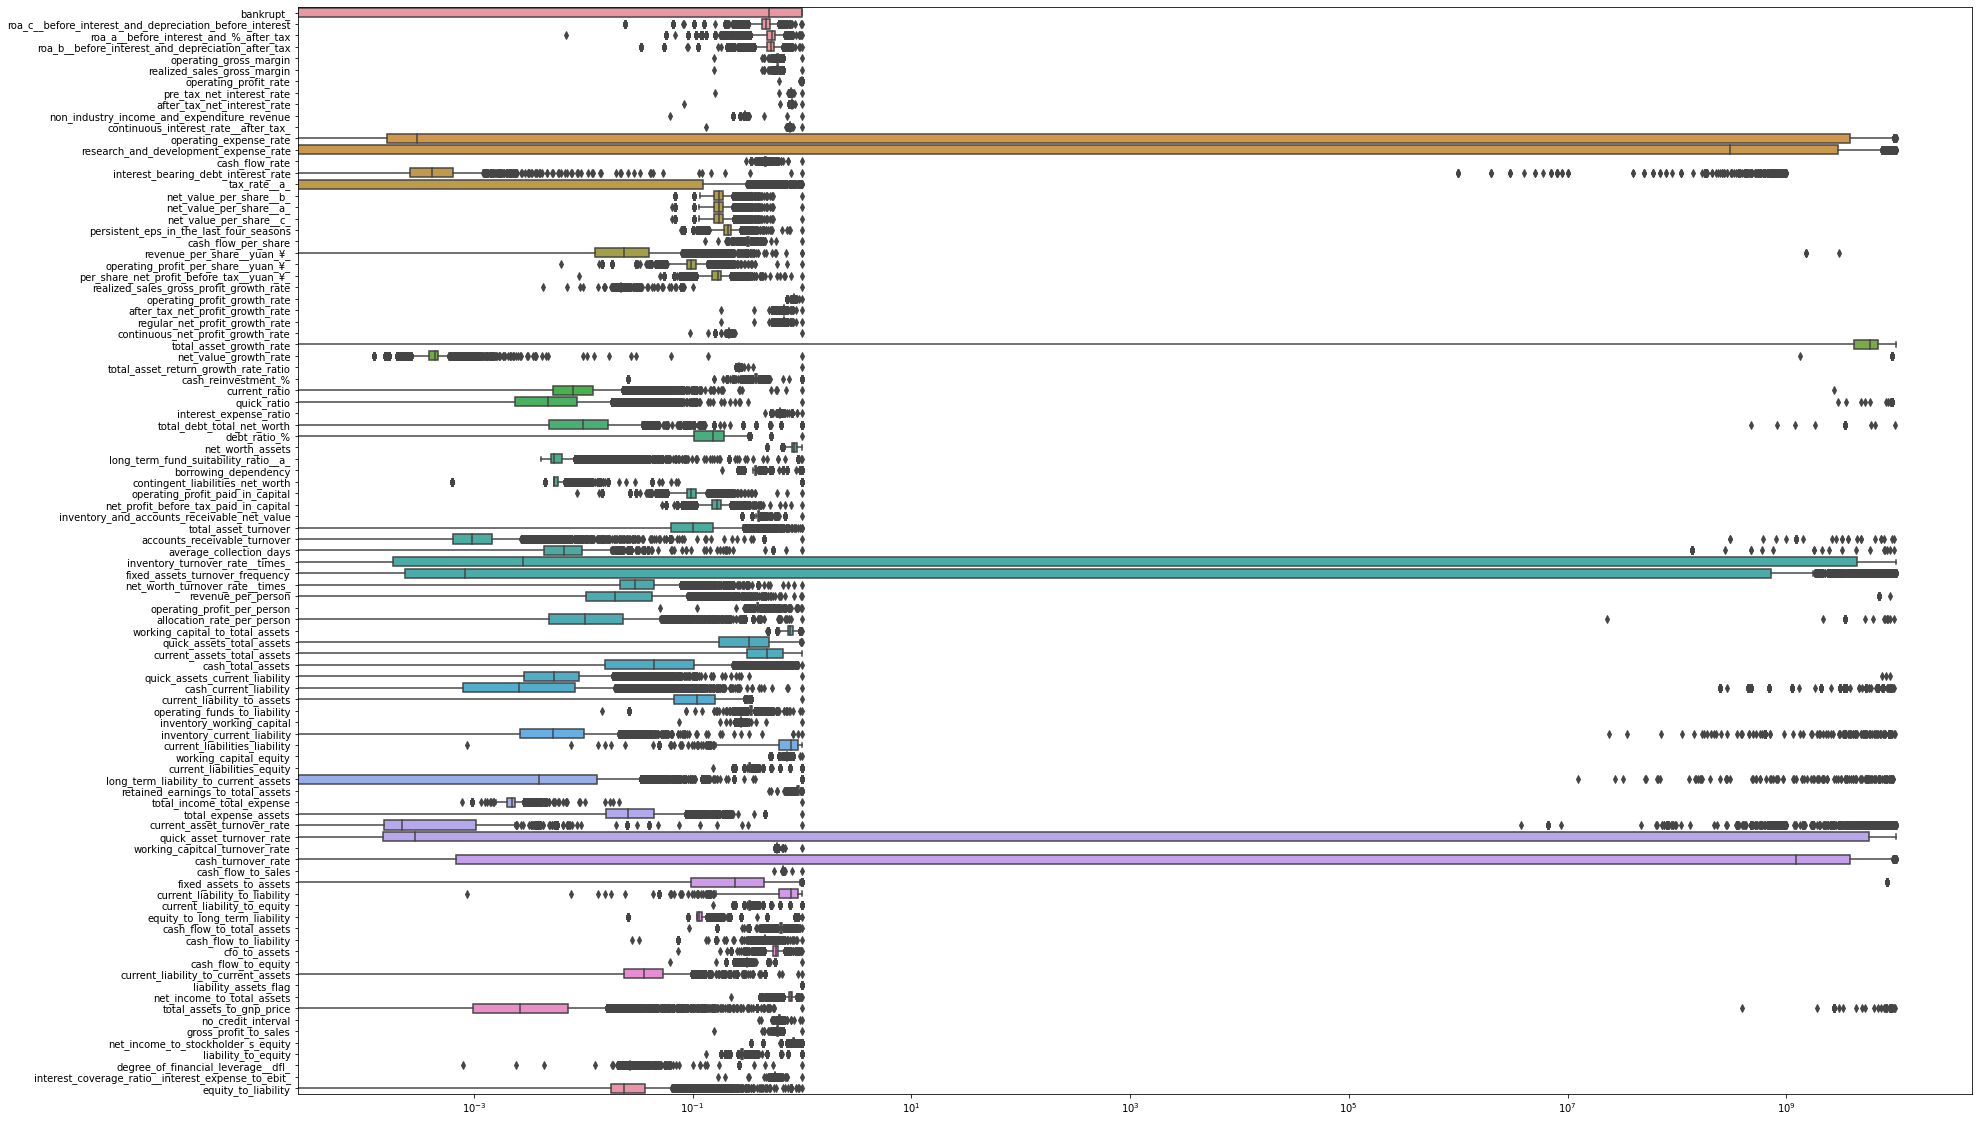

In [ ]:
plt.figure(figsize=(30,20))
boxplot=sns.boxplot(data=df1,orient="h")
boxplot.set(xscale="log")
plt.show()

## Drop Outliers
### Use the quartiles from the box plots

In [ ]:
quartile1 = df1.quantile(q=0.25,axis=0)
# display(quartile1)
quartile3 = df1.quantile(q=0.75,axis=0)
# display(quartile3)
IQR = quartile3 -quartile1
lower_limit = quartile1-1.5*IQR
upper_limit = quartile3+1.5*IQR

lower_limit = lower_limit.drop(["bankrupt_"])
upper_limit = upper_limit.drop(["bankrupt_"])
# print(lower_limit)
# print(" ")
# print(upper_limit)

df1_out = df1[((df1<lower_limit) | (df1>upper_limit)).any(axis=1)]
display(df1_out.shape)
display(df1.shape)

<ipython-input-74-c48d3d6636eb>:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1_out = df1[((df1<lower_limit) | (df1>upper_limit)).any(axis=1)]


(12603, 95)

(13198, 95)

In [ ]:
df2 = df1_out.copy()
df2

,bankrupt_,roa_c__before_interest_and_depreciation_before_interest,roa_a__before_interest_and_%_after_tax,roa_b__before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,continuous_interest_rate__after_tax_,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest_bearing_debt_interest_rate,tax_rate__a_,net_value_per_share__b_,net_value_per_share__a_,net_value_per_share__c_,persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share__yuan_¥_,operating_profit_per_share__yuan_¥_,per_share_net_profit_before_tax__yuan_¥_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after_tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt_total_net_worth,debt_ratio_%,net_worth_assets,long_term_fund_suitability_ratio__a_,borrowing_dependency,contingent_liabilities_net_worth,operating_profit_paid_in_capital,net_profit_before_tax_paid_in_capital,inventory_and_accounts_receivable_net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate__times_,fixed_assets_turnover_frequency,net_worth_turnover_rate__times_,revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets_total_assets,current_assets_total_assets,cash_total_assets,quick_assets_current_liability,cash_current_liability,current_liability_to_assets,operating_funds_to_liability,inventory_working_capital,inventory_current_liability,current_liabilities_liability,working_capital_equity,current_liabilities_equity,long_term_liability_to_current_assets,retained_earnings_to_total_assets,total_income_total_expense,total_expense_assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long_term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability_assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholder_s_equity,liability_to_equity,degree_of_financial_leverage__dfl_,interest_coverage_ratio__interest_expense_to_ebit_,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,3.487364e-03,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,3.713530e-02,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,4.242058e-01,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,4.916808e-03,9.360000e+09,7.190000e+08

## Removing skews using log transform

In [ ]:
target = df2['bankrupt_']
df2_temp = df2.drop(["bankrupt_"],axis=1)

def log_trans(data):
    for col in data:
        skew = data[col].skew()
        if skew>=0.5 or skew<=0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
    return data

df2_temp_log = log_trans(df2_temp)
df2_temp_log.head()

,roa_c__before_interest_and_depreciation_before_interest,roa_a__before_interest_and_%_after_tax,roa_b__before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,continuous_interest_rate__after_tax_,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest_bearing_debt_interest_rate,tax_rate__a_,net_value_per_share__b_,net_value_per_share__a_,net_value_per_share__c_,persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share__yuan_¥_,operating_profit_per_share__yuan_¥_,per_share_net_profit_before_tax__yuan_¥_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after_tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt_total_net_worth,debt_ratio_%,net_worth_assets,long_term_fund_suitability_ratio__a_,borrowing_dependency,contingent_liabilities_net_worth,operating_profit_paid_in_capital,net_profit_before_tax_paid_in_capital,inventory_and_accounts_receivable_net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate__times_,fixed_assets_turnover_frequency,net_worth_turnover_rate__times_,revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets_total_assets,current_assets_total_assets,cash_total_assets,quick_assets_current_liability,cash_current_liability,current_liability_to_assets,operating_funds_to_liability,inventory_working_capital,inventory_current_liability,current_liabilities_liability,working_capital_equity,current_liabilities_equity,long_term_liability_to_current_assets,retained_earnings_to_total_assets,total_income_total_expense,total_expense_assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long_term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability_assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholder_s_equity,liability_to_equity,degree_of_financial_leverage__dfl_,interest_coverage_ratio__interest_expense_to_ebit_,equity_to_liability
0,0.315244,0.353743,0.340571,0.470914,0.470914,0.692632,0.586056,0.592669,0.264398,0.577166,0.000126,0.000000,0.377164,0.000725,0.0,0.137978,0.137978,0.137978,0.156269,0.271297,0.017407,0.091595,0.129919,0.021862,0.614209,0.524124,0.524124,0.196829,22.328696,0.000327,0.233569,0.310220,0.002256,0.001207,0.488550,0.021043,0.188615,0.583569,0.005012,0.329508,0.006458,0.091562,0.129059,0.335068,0.083382,0.001812,0.003481,0.000182,0.000116,0.032374,0.033594,0.331397,0.036462,0.514484,0.154156,0.174493,0.004086,0.001995,0.000147,0.137419,0.288193,0.244451,0.001035,0.516571,0.543065,0.291981,0.025270,0.643550,0.002020,0.062839,20.368018,22.602731,0.466140,19.942380,0.513762,0.353614,0.516571,0.291981,0.119159,0.493205,0.377483,0.418962,0.272242,0.111765,0.0,0.540489,0.009177,0.484202,0.470912,0.603162,0.254799,0.026253,0.447279,0.016335
1,0.381371,0.430622,0.416557,0.476380,0.476380,0.692620,0.586330,0.592940,0.265096,0.577459,0.000290,0.000000,0.379715,0.000647,0.0,0.167420,0.167420,0.167420,0.189747,0.276219,0.020924,0.089587,0.156934,0.021840,0.614152,0.524547,0.524552,0.196898,22.533193,0.000443,0.234689,0.319696,0.005998,0.004031,0.491748,0.012425,0.158009,0.603673,0.005046,0.319733,0.005818,0.089606,0.156116,0.334846,0.062475,0.001286,0.004905,22.959711,20.393372,0.025165,0.006865,0.330447,0.012260,0.560250,0.119769,0.167562,0.014837,0.00

In [ ]:
df3 = df2_temp_log.copy()

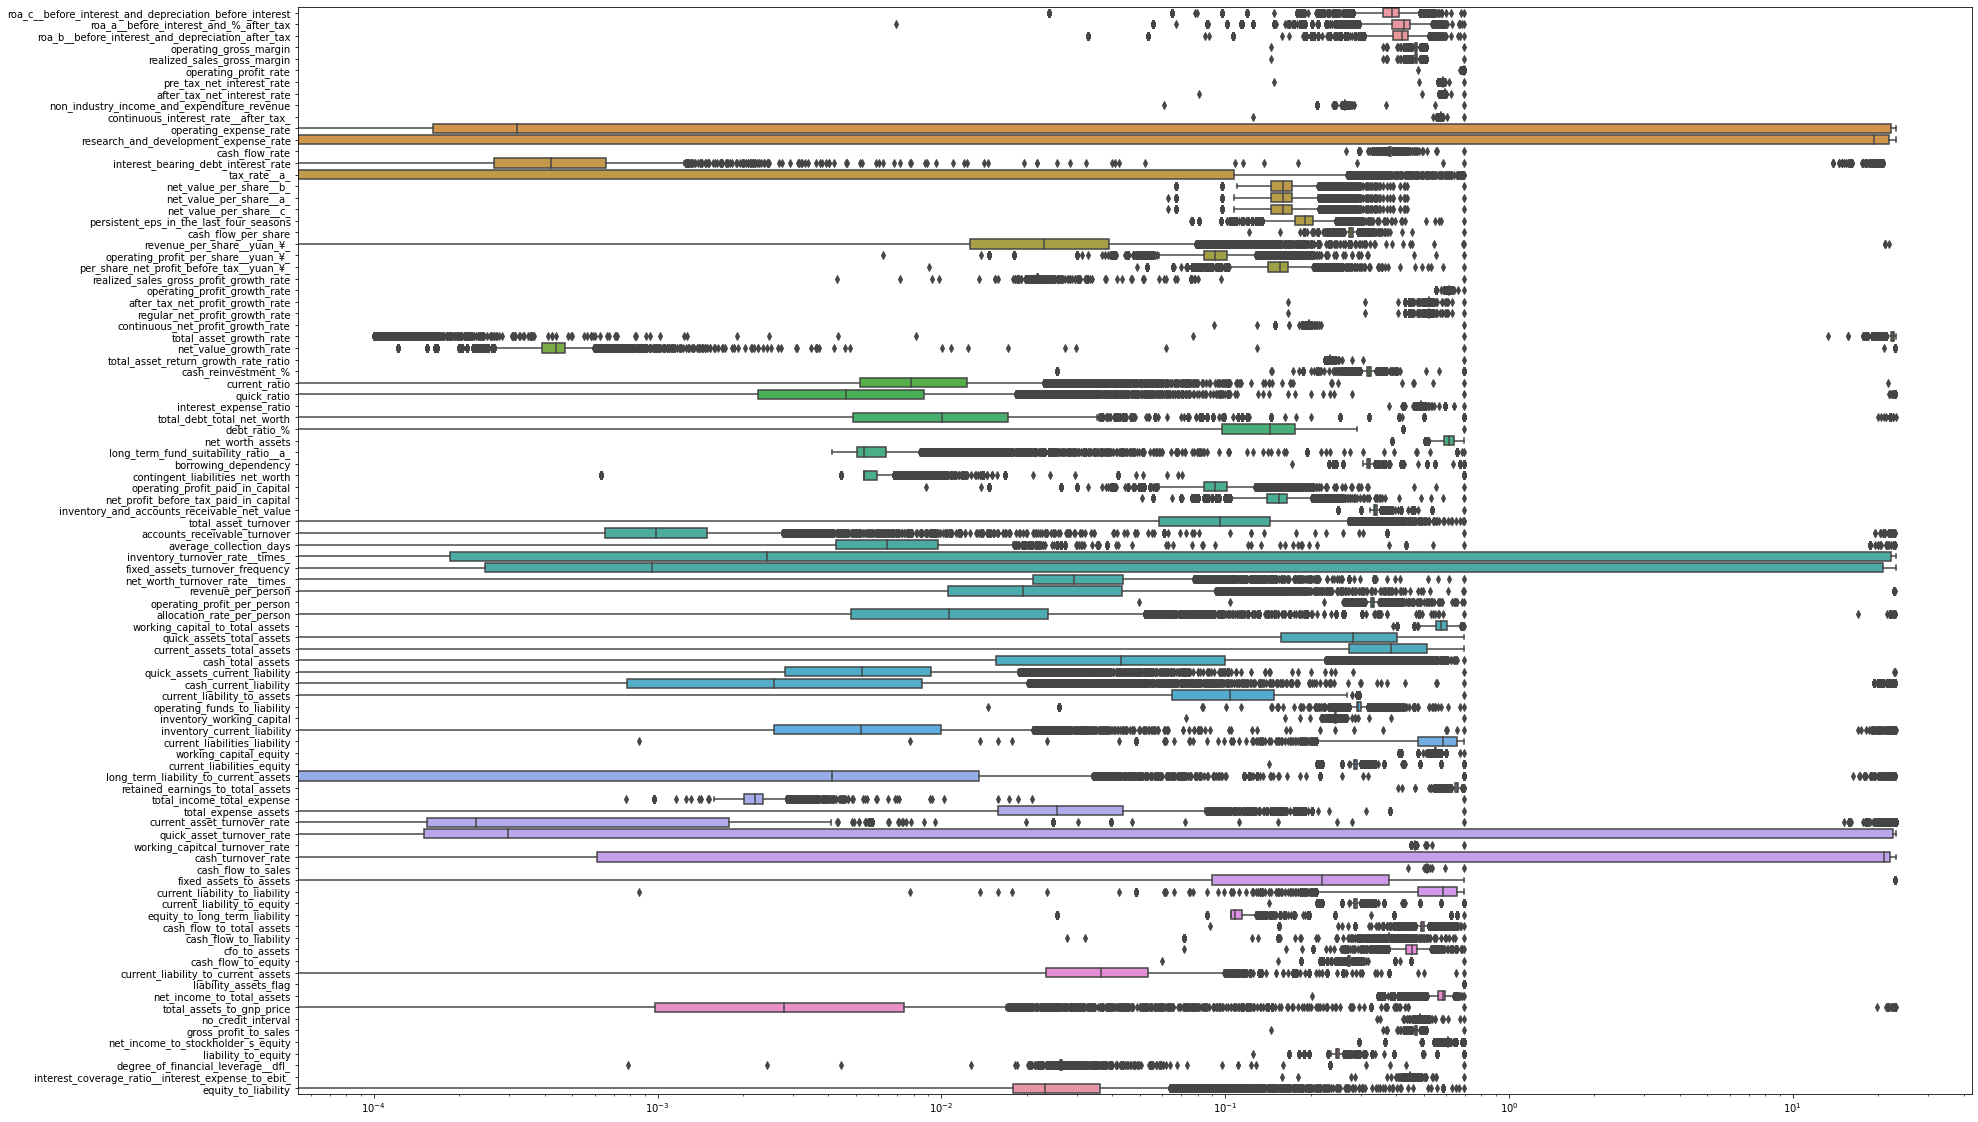

In [ ]:
plt.figure(figsize=(30,20))
boxplot=sns.boxplot(data=df3,orient="h")
boxplot.set(xscale="log")
plt.show()

In [ ]:
target

0        1
1        1
2        1
3        1
4        1
        ..
13193    1
13194    1
13195    1
13196    1
13197    1
Name: bankrupt_, Length: 12603, dtype: int64

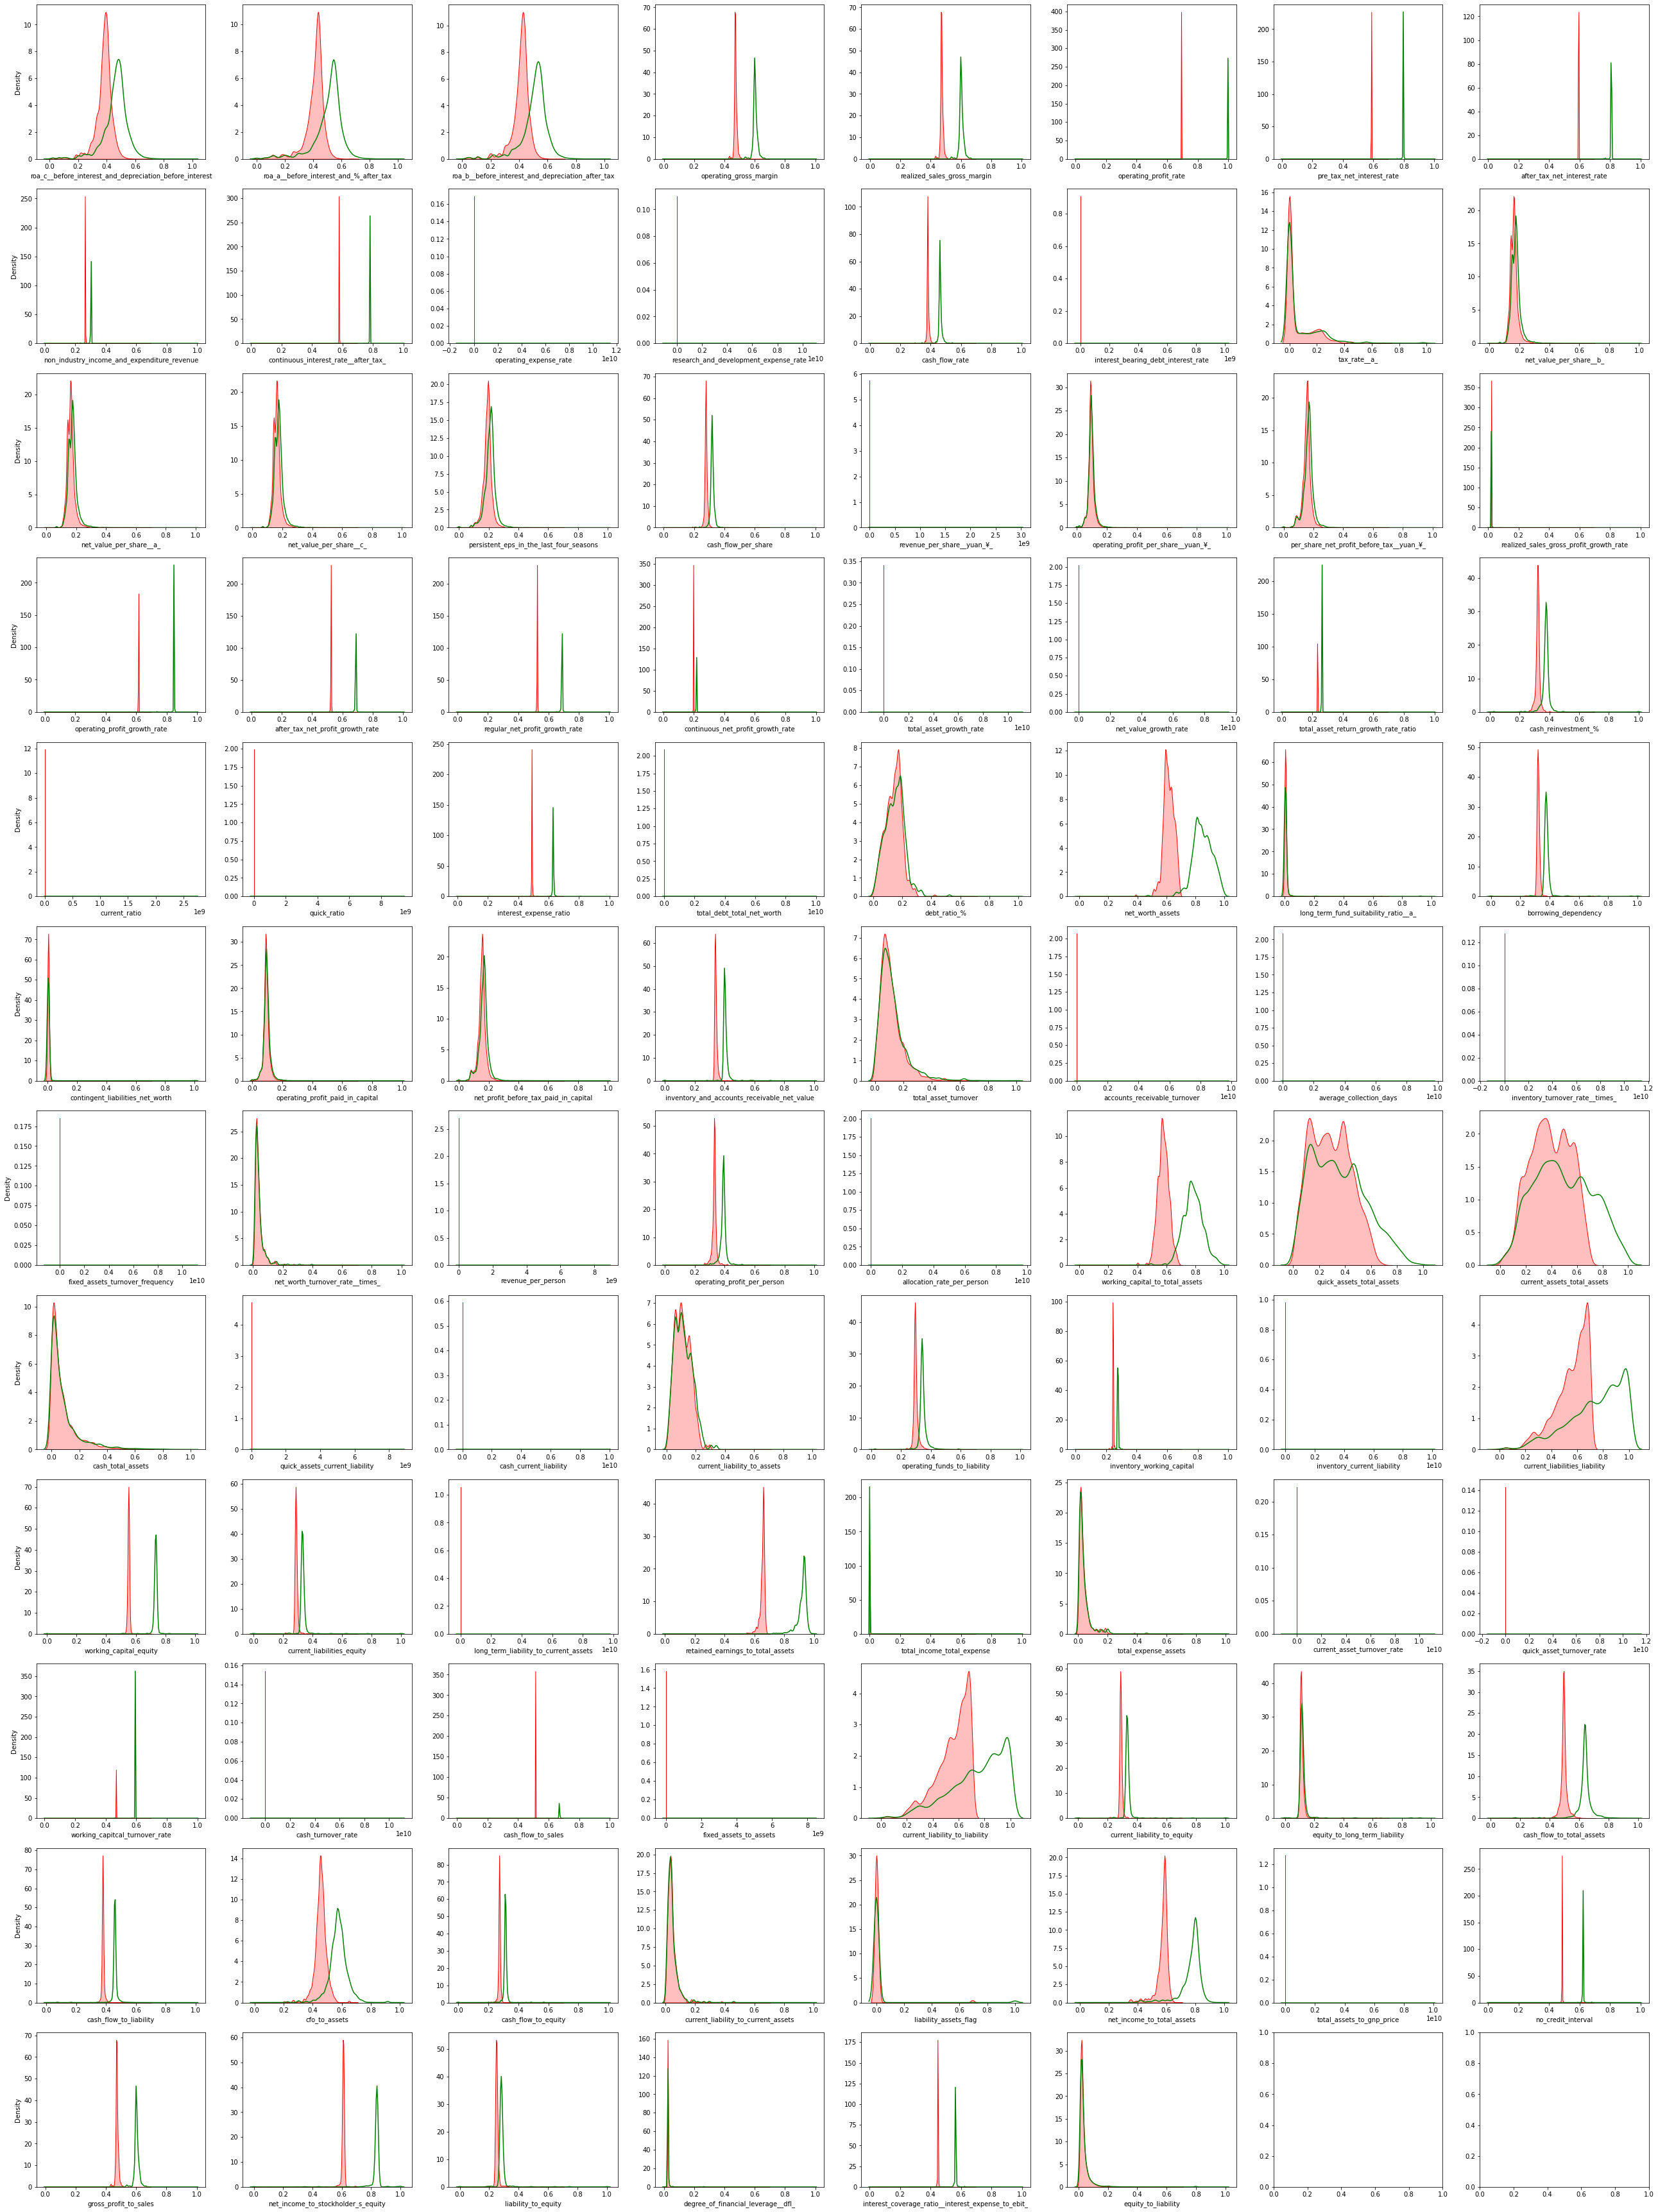

Red represents distributions after log transforms, green represents before log transform


In [ ]:
# Visualisation of distributions after sub-sampling after outlier removal and log transform
compare_df = df1.drop(["bankrupt_"],axis=1)

cols = list(df2_temp.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(df2_temp_log[cols[i]], ax = ax[i // ncols, i % ncols],fill=True,color="red")
    sns.kdeplot(df1[cols[i]], ax = ax[i // ncols, i % ncols],color="green")
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()
print("Red represents distributions after log transforms, green represents before log transform")

In [ ]:
df2

,bankrupt_,roa_c__before_interest_and_depreciation_before_interest,roa_a__before_interest_and_%_after_tax,roa_b__before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,continuous_interest_rate__after_tax_,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest_bearing_debt_interest_rate,tax_rate__a_,net_value_per_share__b_,net_value_per_share__a_,net_value_per_share__c_,persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share__yuan_¥_,operating_profit_per_share__yuan_¥_,per_share_net_profit_before_tax__yuan_¥_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after_tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt_total_net_worth,debt_ratio_%,net_worth_assets,long_term_fund_suitability_ratio__a_,borrowing_dependency,contingent_liabilities_net_worth,operating_profit_paid_in_capital,net_profit_before_tax_paid_in_capital,inventory_and_accounts_receivable_net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate__times_,fixed_assets_turnover_frequency,net_worth_turnover_rate__times_,revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets_total_assets,current_assets_total_assets,cash_total_assets,quick_assets_current_liability,cash_current_liability,current_liability_to_assets,operating_funds_to_liability,inventory_working_capital,inventory_current_liability,current_liabilities_liability,working_capital_equity,current_liabilities_equity,long_term_liability_to_current_assets,retained_earnings_to_total_assets,total_income_total_expense,total_expense_assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long_term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability_assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholder_s_equity,liability_to_equity,degree_of_financial_leverage__dfl_,interest_coverage_ratio__interest_expense_to_ebit_,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,3.487364e-03,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,3.713530e-02,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,4.242058e-01,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,4.916808e-03,9.360000e+09,7.190000e+08

In [ ]:
df2.to_csv("drive/MyDrive/ML_Lab_Datasets/Bankruptcy_Prediction_Preprocessed_Dataset.csv",index=False)